In [1]:
!pip install yfinance

In [2]:
import yfinance as yf
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error,mean_absolute_percentage_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

In [3]:
start = datetime.datetime(2022,11,25)
end = datetime.datetime(2023,11,25)
ws = yf.download('MARUTI.NS',start,end)
ws['SMA30'] = ws['Close'].rolling(30).mean()

[*********************100%%**********************]  1 of 1 completed


In [4]:
ws.head()

,Open,High,Low,Close,Adj Close,Volume,SMA30
Date,,,,,,,
2022-11-25,9000.000000,9080.000000,8947.5,9019.500000,8935.413086,545439,NaN
2022-11-28,9028.000000,9104.099609,8950.0,8985.400391,8901.631836,439956,NaN
2022-11-29,8985.000000,9024.750000,8888.0,8910.200195,8827.132812,606692,NaN
2022-11-30,8924.000000,9020.000000,8870.0,8974.150391,8890.486328,1087650,NaN
2022-12-01,9019.049805,9025.000000,8930.0,8958.150391,8874.635742,694489,NaN


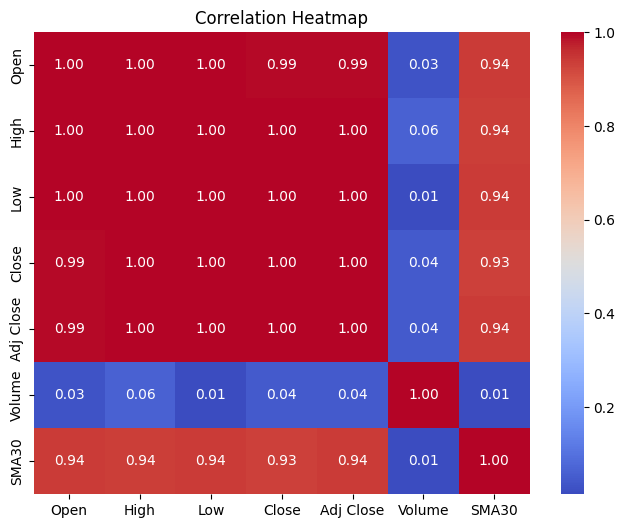

In [5]:
# Calculate the correlation matrix
correlation_matrix = ws.corr()
# Create a heatmap
plt.figure(figsize=(8, 6))  # Optional: Set the figure size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")  # Optional: Set the title
# Display the heatmap
plt.show()

In [6]:

ws['Close'] = ws['Close'].round(2)
date = ws.index
ws['Underlying Log Returns (C)'] = np.log(ws['Close'] / ws['Close'].shift(1))
ws['Underlying Log Returns (C)'] = ws['Underlying Log Returns (C)'].round(4)
ws.index = range(len(ws))
ws.loc[0,'Previous Day Underlying Volatility (D)'] = 0.018

index=1
print(ws.at[0, 'Previous Day Underlying Volatility (D)'])
print(ws.at[index-1,'Previous Day Underlying Volatility (D)'])
print(ws.at[1, 'Underlying Log Returns (C)'])

# Calculate 'Current Day Underlying Daily Volatility (E)' iteratively
for index in range(1, len(ws)):  # Start from index + 1
          # For the first row, the formula uses the initial 'Previous Day Underlying Volatility (D)'
          ws.at[index, 'Current Day Underlying Daily Volatility (E)'] = np.sqrt(0.995 * ws.at[index-1,'Previous Day Underlying Volatility (D)'] ** 2 + 0.005 * ws.at[index,'Underlying Log Returns (C)'] ** 2)
          # ws['Current Day Underlying Daily Volatility (E)'] = ws['Current Day Underlying Daily Volatility (E)'].round(4)
          ws.at[index, 'Previous Day Underlying Volatility (D)'] = ws.at[index, 'Current Day Underlying Daily Volatility (E)']
# Assuming df is your DataFrame
#ws = ws.drop(ws.index[-1])
ws.index=date
ws['Current Day Underlying Daily Volatility (E)'] = ws['Current Day Underlying Daily Volatility (E)']
ws = ws.iloc[1:]

0.018
0.018
-0.0038


In [7]:
ws.tail()

,Open,High,Low,Close,Adj Close,Volume,SMA30,Underlying Log Returns (C),Previous Day Underlying Volatility (D),Current Day Underlying Daily Volatility (E)
Date,,,,,,,,,,
2023-11-20,10500.000000,10593.349609,10500.000000,10566.25,10566.250000,234246,10472.893294,0.0041,0.013066,0.013066
2023-11-21,10619.000000,10619.000000,10500.000000,10535.15,10535.150391,312242,10480.663314,-0.0029,0.013035,0.013035
2023-11-22,10550.000000,10551.250000,10420.000000,10494.55,10494.549805,378891,10488.988314,-0.0039,0.013005,0.013005
2023-11-23,10487.799805,10525.000000,10394.049805,10488.50,10488.500000,453820,10492.771647,-0.0006,0.012973,0.012973
2023-11-24,10505.950195,10566.500000,10462.000000,10515.65,10515.650391,380306,10496.223340,0.0026,0.012941,0.012941


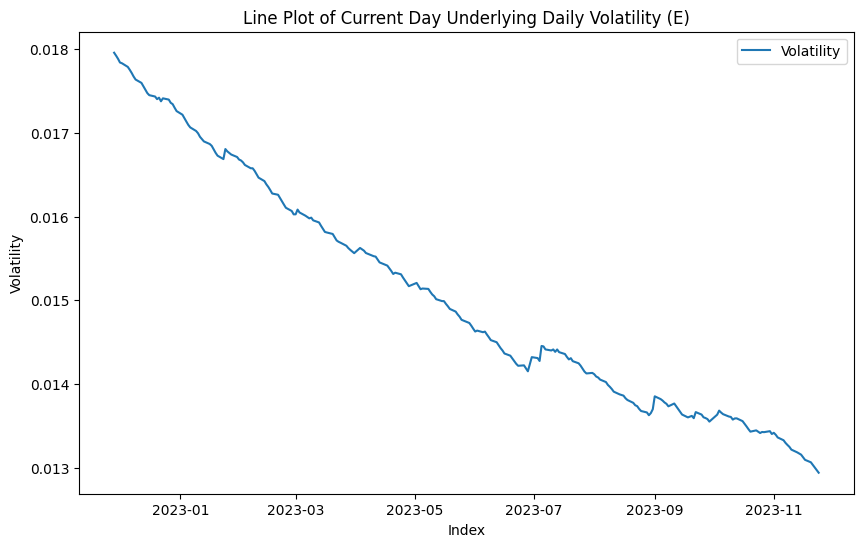

In [8]:
# Assuming you have your DataFrame 'ws' with the relevant data
# Create a line plot of 'Current Day Underlying Daily Volatility (E)'
plt.figure(figsize=(10, 6))  # Optional: Set the figure size
plt.plot(ws.index, ws['Current Day Underlying Daily Volatility (E)'], label='Volatility')
plt.xlabel('Index')  # Optional: Set the x-axis label
plt.ylabel('Volatility')  # Optional: Set the y-axis label
plt.title('Line Plot of Current Day Underlying Daily Volatility (E)')  # Optional: Set the title
plt.legend()  # Optional: Show the legend

# Display the plot
plt.show()


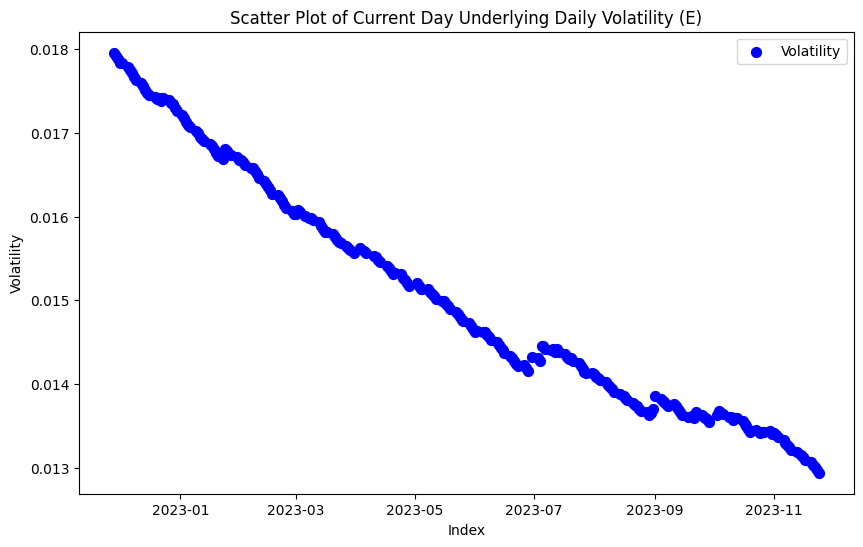

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have your DataFrame 'ws' with the relevant data

# Create a scatter plot of 'Current Day Underlying Daily Volatility (E)'
plt.figure(figsize=(10, 6))  # Optional: Set the figure size
plt.scatter(ws.index, ws['Current Day Underlying Daily Volatility (E)'], label='Volatility', marker='o', s=50, c='blue')
plt.xlabel('Index')  # Optional: Set the x-axis label
plt.ylabel('Volatility')  # Optional: Set the y-axis label
plt.title('Scatter Plot of Current Day Underlying Daily Volatility (E)')  # Optional: Set the title
plt.legend()  # Optional: Show the legend
# Display the plot
plt.show()

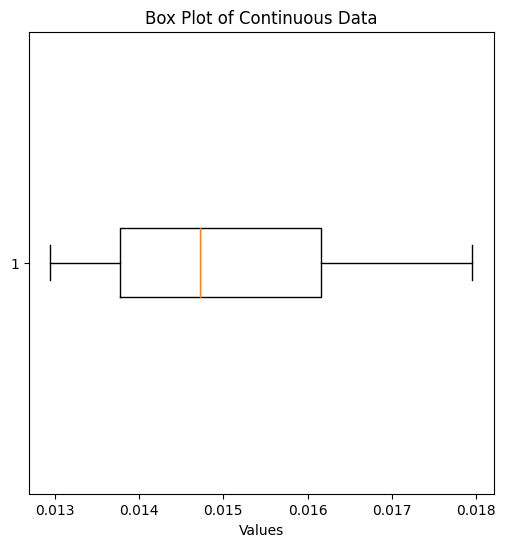

In [10]:
# Create a box plot
plt.figure(figsize=(6, 6))  # Optional: Set the figure size
plt.boxplot(ws['Current Day Underlying Daily Volatility (E)'], vert=False)  # Create a horizontal box plot (vert=False)
plt.xlabel('Values')  # Optional: Set the x-axis label
plt.title('Box Plot of Continuous Data')  # Optional: Set the title
# Display the plot
plt.show()

<ipython-input-11-065e43bdf794>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(ws['Current Day Underlying Daily Volatility (E)'], shade=True)  # Create a density plot with shading


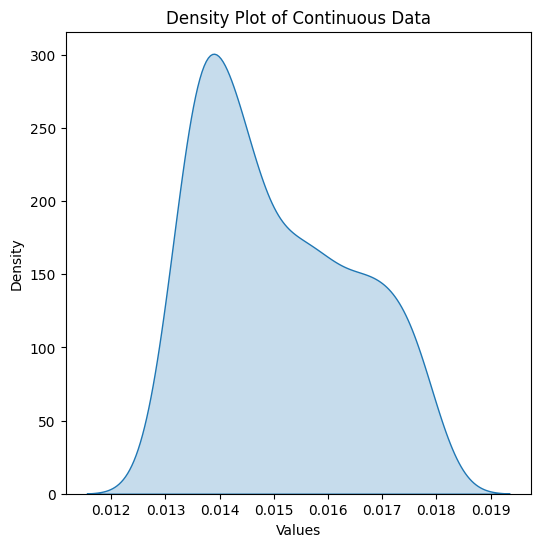

In [11]:
# Create a density plot (Kernel Density Estimation)
plt.figure(figsize=(6, 6))  # Optional: Set the figure size
sns.kdeplot(ws['Current Day Underlying Daily Volatility (E)'], shade=True)  # Create a density plot with shading
plt.xlabel('Values')  # Optional: Set the x-axis label
plt.ylabel('Density')  # Optional: Set the y-axis label
plt.title('Density Plot of Continuous Data')  # Optional: Set the title
# Display the plot
plt.show()

In [12]:
ws.head()

,Open,High,Low,Close,Adj Close,Volume,SMA30,Underlying Log Returns (C),Previous Day Underlying Volatility (D),Current Day Underlying Daily Volatility (E)
Date,,,,,,,,,,
2022-11-28,9028.000000,9104.099609,8950.00,8985.40,8901.631836,439956,NaN,-0.0038,0.017957,0.017957
2022-11-29,8985.000000,9024.750000,8888.00,8910.20,8827.132812,606692,NaN,-0.0084,0.017922,0.017922
2022-11-30,8924.000000,9020.000000,8870.00,8974.15,8890.486328,1087650,NaN,0.0072,0.017884,0.017884
2022-12-01,9019.049805,9025.000000,8930.00,8958.15,8874.635742,694489,NaN,-0.0018,0.017840,0.017840
2022-12-02,8820.000000,8928.900391,8754.75,8815.85,8733.661133,971612,NaN,-0.0160,0.017831,0.017831


In [13]:
x = ws[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume','Underlying Log Returns (C)',	'Previous Day Underlying Volatility (D)']]
y = ws['Current Day Underlying Daily Volatility (E)']

In [14]:
last_x = x.iloc[-5:]
last_y = y.iloc[-5:]
x = x.iloc[:-5]
y = y.iloc[:-5]

In [15]:
last_x

,Open,High,Low,Close,Adj Close,Volume,Underlying Log Returns (C),Previous Day Underlying Volatility (D)
Date,,,,,,,,
2023-11-20,10500.000000,10593.349609,10500.000000,10566.25,10566.250000,234246,0.0041,0.013066
2023-11-21,10619.000000,10619.000000,10500.000000,10535.15,10535.150391,312242,-0.0029,0.013035
2023-11-22,10550.000000,10551.250000,10420.000000,10494.55,10494.549805,378891,-0.0039,0.013005
2023-11-23,10487.799805,10525.000000,10394.049805,10488.50,10488.500000,453820,-0.0006,0.012973
2023-11-24,10505.950195,10566.500000,10462.000000,10515.65,10515.650391,380306,0.0026,0.012941


In [16]:
last_y

Date
2023-11-20    0.013066
2023-11-21    0.013035
2023-11-22    0.013005
2023-11-23    0.012973
2023-11-24    0.012941
Name: Current Day Underlying Daily Volatility (E), dtype: float64

In [17]:
x

,Open,High,Low,Close,Adj Close,Volume,Underlying Log Returns (C),Previous Day Underlying Volatility (D)
Date,,,,,,,,
2022-11-28,9028.000000,9104.099609,8950.000000,8985.40,8901.631836,439956,-0.0038,0.017957
2022-11-29,8985.000000,9024.750000,8888.000000,8910.20,8827.132812,606692,-0.0084,0.017922
2022-11-30,8924.000000,9020.000000,8870.000000,8974.15,8890.486328,1087650,0.0072,0.017884
2022-12-01,9019.049805,9025.000000,8930.000000,8958.15,8874.635742,694489,-0.0018,0.017840
2022-12-02,8820.000000,8928.900391,8754.750000,8815.85,8733.661133,971612,-0.0160,0.017831
...,...,...,...,...,...,...,...,...
2023-11-10,10375.000000,10416.400391,10320.000000,10388.80,10388.799805,206395,-0.0011,0.013217
2023-11-13,10429.000000,10429.000000,10363.650391,10398.40,10398.400391,261891,0.0009,0.013185
2023-11-15,10497.000000,10497.000000,10375.049805,10456.05,10456.049805,436538,0.0055,0.013157


In [18]:
x.shape

(242, 8)

In [19]:

y.shape

(242,)

Polynomial regression

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
# x_train=x_train.to_numpy().reshape(-1,1)
# print(x_train.shape)

(193, 8)
(49, 8)
(193,)
(49,)


In [21]:
x_test.dtypes

Open                                      float64
High                                      float64
Low                                       float64
Close                                     float64
Adj Close                                 float64
Volume                                      int64
Underlying Log Returns (C)                float64
Previous Day Underlying Volatility (D)    float64
dtype: object

In [22]:
x_test.head()

,Open,High,Low,Close,Adj Close,Volume,Underlying Log Returns (C),Previous Day Underlying Volatility (D)
Date,,,,,,,,
2023-02-28,8650.000000,8709.000000,8605.299805,8624.35,8543.947266,370998,-0.0009,0.016027
2023-02-20,8807.750000,8849.000000,8675.250000,8693.65,8612.601562,298434,-0.0130,0.016261
2023-09-01,9999.000000,10397.950195,9951.349609,10331.25,10331.250000,1193178,0.0322,0.013854
2023-10-06,10283.000000,10332.950195,10260.000000,10302.05,10302.049805,335700,0.0090,0.013641
2023-05-10,9128.799805,9180.000000,9060.000000,9168.15,9082.677734,366827,0.0062,0.015070


In [23]:
poly = PolynomialFeatures(degree=3)#on degree 1 it gives exact values on 2 less accurate and 3 may be a sort of best fit to the algorithm
X_poly = poly.fit_transform(x_train)
X_poly_test = poly.fit_transform(x_test)
X_poly_testf = poly.fit_transform(last_x)
poly.fit(X_poly,y_train)
lin2=LinearRegression()
lin2.fit(X_poly,y_train)

LinearRegression()

In [24]:
y_pred=lin2.predict(X_poly_test)
mse = mean_squared_error(y_test, y_pred)
mae=mean_absolute_error(y_test,y_pred)
mape=mean_absolute_percentage_error(y_test,y_pred)
print("Mean Squared Error:", mse)
print("Mean aboslute Error:", mae)
print("Mean absolute percentage Error:", mape)

Mean Squared Error: 1.8896185697554786e-07
Mean aboslute Error: 0.0002004503704152371
Mean absolute percentage Error: 0.01390166199574292


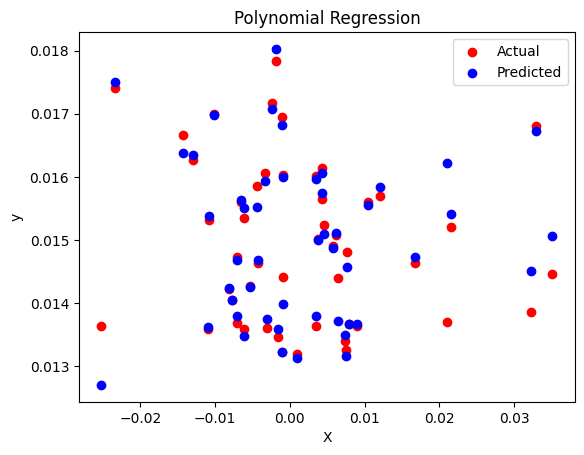

In [25]:
xtes=x_test['Underlying Log Returns (C)']
plt.scatter(xtes, y_test, color='red', label='Actual')
plt.scatter(xtes, y_pred, color='blue', label='Predicted')
plt.title('Polynomial Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

In [26]:
print(y_pred[:10])


[0.0159935  0.0163483  0.01450277 0.01366084 0.01510391 0.01312833
 0.0150595  0.01365815 0.01349383 0.01574336]


In [27]:
print(x_test[:10])

                    Open          High           Low     Close     Adj Close  \
Date                                                                           
2023-02-28   8650.000000   8709.000000   8605.299805   8624.35   8543.947266   
2023-02-20   8807.750000   8849.000000   8675.250000   8693.65   8612.601562   
2023-09-01   9999.000000  10397.950195   9951.349609  10331.25  10331.250000   
2023-10-06  10283.000000  10332.950195  10260.000000  10302.05  10302.049805   
2023-05-10   9128.799805   9180.000000   9060.000000   9168.15   9082.677734   
2023-11-13  10429.000000  10429.000000  10363.650391  10398.40  10398.400391   
2023-07-05   9697.000000  10036.950195   9675.000000   9992.30   9899.143555   
2023-10-05  10181.950195  10270.950195  10109.000000  10210.15  10210.150391   
2023-11-02  10290.299805  10345.000000  10201.000000  10303.60  10303.599609   
2023-03-27   8250.000000   8316.799805   8229.549805   8278.35   8201.172852   

             Volume  Underlying Log Ret

In [28]:
y_pred=lin2.predict(X_poly_testf)
print(y_pred.round(4))

[0.013  0.0129 0.013  0.013  0.0129]


2.KNN Regressor

Mean Squared Error: 1.7166462809403552e-06
Mean aboslute Error: 0.0011239541848674312
Mean absolute percentage Error: 0.07532739750847821


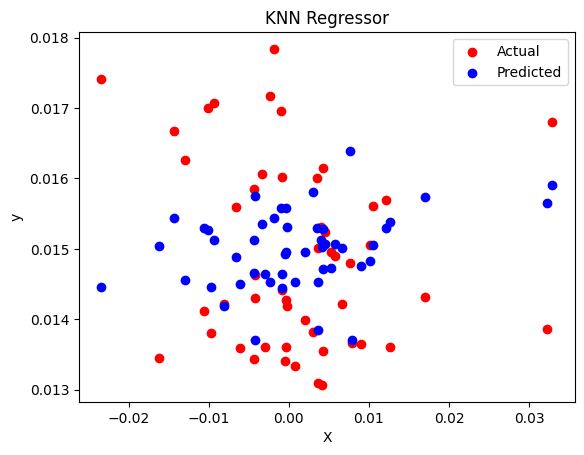

In [29]:
# Import necessary libraries
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
x = ws[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume','Underlying Log Returns (C)',	'Previous Day Underlying Volatility (D)']]
y = ws['Current Day Underlying Daily Volatility (E)']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)

# Create KNN regressor object
knn_regressor = KNeighborsRegressor(n_neighbors=5)

# Fit the model on the training data
knn_regressor.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae=mean_absolute_error(y_test,y_pred)
mape=mean_absolute_percentage_error(y_test,y_pred)
print("Mean Squared Error:", mse)
print("Mean aboslute Error:", mae)
print("Mean absolute percentage Error:", mape)
xtes=X_test['Underlying Log Returns (C)']
# Plot the results
plt.scatter(xtes, y_test, color='red', label='Actual')
plt.scatter(xtes, y_pred, color='blue', label='Predicted')
plt.title('KNN Regressor')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

3.SVM REGRESSOR

Best Hyperparameters: {'kernel': 'rbf', 'gamma': 8.409631269162526, 'epsilon': 1.7306270775786883, 'C': 525.2243110143486}
Mean Squared Error: 2.0164344062184697e-06
Mean aboslute Error: 0.0012582505803691176
Mean absolute percentage Error: 0.08665548382095047
Mean Squared Error with Best Hyperparameters: 2.0164344062184697e-06


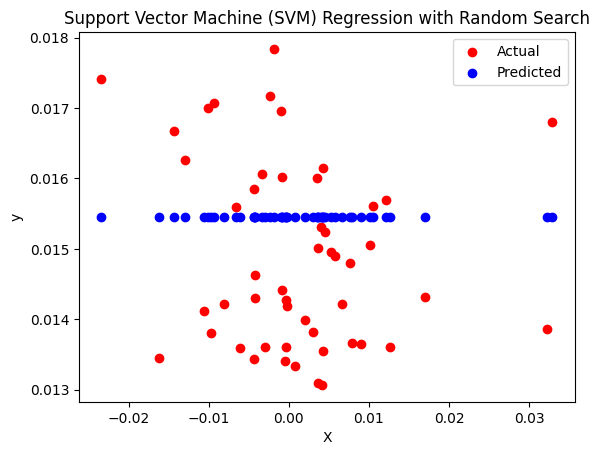

In [30]:
# Import necessary libraries
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

x = ws[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Underlying Log Returns (C)', 'Previous Day Underlying Volatility (D)']]
y = ws['Current Day Underlying Daily Volatility (E)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)

# Define the parameter grid for random search
param_grid = {
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'C': np.random.rand(20) * 1000,
    'gamma': np.random.rand(20) * 10,
    'epsilon': np.random.rand(20) * 2
}

# Create SVR object
svr = SVR()

# Create RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=svr, param_distributions=param_grid,
                                  scoring='neg_mean_squared_error', cv=5, n_iter=100)

random_search.fit(X_train, y_train)

# Print the best hyperparameters
best_params = random_search.best_params_
print(f'Best Hyperparameters: {best_params}')

# Apply the best hyperparameters to SVR
best_svr = SVR(**best_params)

# Fit the model on the training data with the best hyperparameters
best_svr.fit(X_train, y_train)

# Make predictions on the test data
y_pred = best_svr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae=mean_absolute_error(y_test,y_pred)
mape=mean_absolute_percentage_error(y_test,y_pred)
print("Mean Squared Error:", mse)
print("Mean aboslute Error:", mae)
print("Mean absolute percentage Error:", mape)
print(f'Mean Squared Error with Best Hyperparameters: {mse}')

xtes = X_test['Underlying Log Returns (C)']

# Plot the results
plt.scatter(xtes, y_test, color='red', label='Actual')
plt.scatter(xtes, y_pred, color='blue', label='Predicted')
plt.title('Support Vector Machine (SVM) Regression with Random Search')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()


4.ARIMA (AutoRegressive Integrated Moving Average)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsm

Mean Squared Error: 7.230326936733337e-06
Mean aboslute Error: 0.001528599144839061
Mean absolute percentage Error: 0.10157844173842
Mean Squared Error: 7.230326936733337e-06
(50, 7)
(50,)


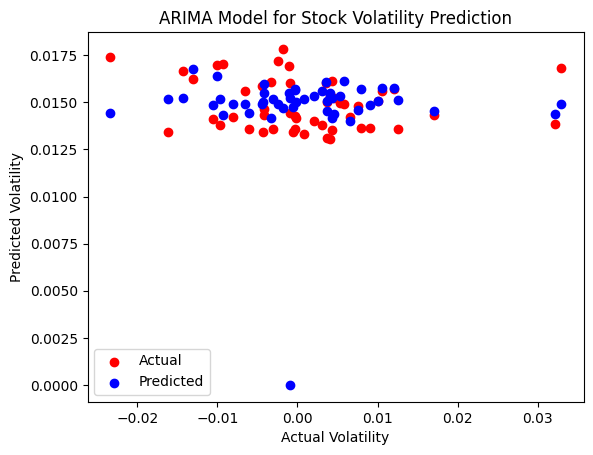

In [31]:
import statsmodels.api as sm

# Prepare the data for ARIMA
x = ws[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Underlying Log Returns (C)']]
y = ws['Current Day Underlying Daily Volatility (E)']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)
# Fit the ARIMA model
arima_model = sm.tsa.arima.ARIMA(y_train, order=(1, 1, 1))
arima_model_fit = arima_model.fit()

# Make predictions on the test data
y_pred = arima_model_fit.predict(start=0, end=len(x_test)-1)
mse = mean_squared_error(y_test, y_pred)
mae=mean_absolute_error(y_test,y_pred)
mape=mean_absolute_percentage_error(y_test,y_pred)
print("Mean Squared Error:", mse)
print("Mean aboslute Error:", mae)
print("Mean absolute percentage Error:", mape)
print("Mean Squared Error:", mse)
print(x_test.shape)
print(y_test.shape)
xtes=x_test['Underlying Log Returns (C)']
# Plot the results
plt.scatter(xtes, y_test, color='red', label='Actual')
plt.scatter(xtes, y_pred, color='blue', label='Predicted')
plt.title('ARIMA Model for Stock Volatility Prediction')
plt.xlabel('Actual Volatility')
plt.ylabel('Predicted Volatility')
plt.legend()
plt.show()


In [32]:
print(y_test.shape)
print(y_pred.shape)

(50,)
(50,)


5.Random forest regressor

Mean Squared Error: 1.5839650770348562e-09
Mean aboslute Error: 2.4471433188915785e-05
Mean absolute percentage Error: 0.0016493672621381188


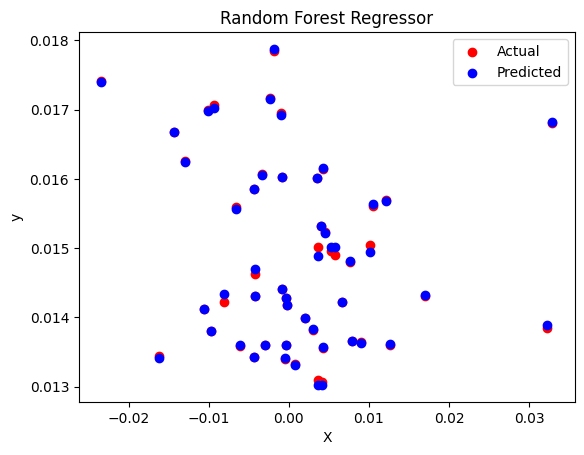

In [33]:
# Import necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
x = ws[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume','Underlying Log Returns (C)', 'Previous Day Underlying Volatility (D)']]
y = ws['Current Day Underlying Daily Volatility (E)']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)

# Create Random Forest Regressor object
rf_regressor = RandomForestRegressor(n_estimators=100)

# Fit the model on the training data
rf_regressor.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae=mean_absolute_error(y_test,y_pred)
mape=mean_absolute_percentage_error(y_test,y_pred)
print("Mean Squared Error:", mse)
print("Mean aboslute Error:", mae)
print("Mean absolute percentage Error:", mape)
xtes=X_test['Underlying Log Returns (C)']
# Plot the results
plt.scatter(xtes, y_test, color='red', label='Actual')
plt.scatter(xtes, y_pred, color='blue', label='Predicted')
plt.title('Random Forest Regressor')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()


6.LSTM

In [34]:
import tensorflow as tf
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Prepare the data
x = ws[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Underlying Log Returns (C)', 'Previous Day Underlying Volatility (D)']]
y = ws['Current Day Underlying Daily Volatility (E)']

# Scale the data
scaler = MinMaxScaler(feature_range=(-1, 1))
scaled_data = scaler.fit_transform(x)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(scaled_data, y, test_size=0.2, random_state=100)

# Create the LSTM model
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    tf.keras.layers.LSTM(32),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32)

# Make predictions on the test data
y_pred = model.predict(X_test)



Epoch 1/100
7/7 [==============================] - 18s 26ms/step - loss: 9.5492e-05
Epoch 2/100
7/7 [==============================] - 0s 23ms/step - loss: 4.0093e-05
Epoch 3/100
7/7 [==============================] - 0s 31ms/step - loss: 1.3885e-05
Epoch 4/100
7/7 [==============================] - 0s 21ms/step - loss: 9.4951e-06
Epoch 5/100
7/7 [==============================] - 0s 29ms/step - loss: 6.2278e-06
Epoch 6/100
7/7 [==============================] - 0s 31ms/step - loss: 2.8483e-06
Epoch 7/100
7/7 [==============================] - 0s 23ms/step - loss: 2.0622e-06
Epoch 8/100
7/7 [==============================] - 0s 27ms/step - loss: 1.0262e-06
Epoch 9/100
7/7 [==============================] - 0s 24ms/step - loss: 5.9836e-07
Epoch 10/100
7/7 [==============================] - 0s 24ms/step - loss: 5.2165e-07
Epoch 11/100
7/7 [==============================] - 0s 25ms/step - loss: 4.8279e-07
Epoch 12/100
7/7 [==============================] - 0s 29ms/step - loss: 4.8101e-07


Mean Squared Error: 1.4617152749540278e-07
Mean aboslute Error: 0.00031585234328980927
Mean absolute percentage Error: 0.021603828600965203
(50,)
(50,)


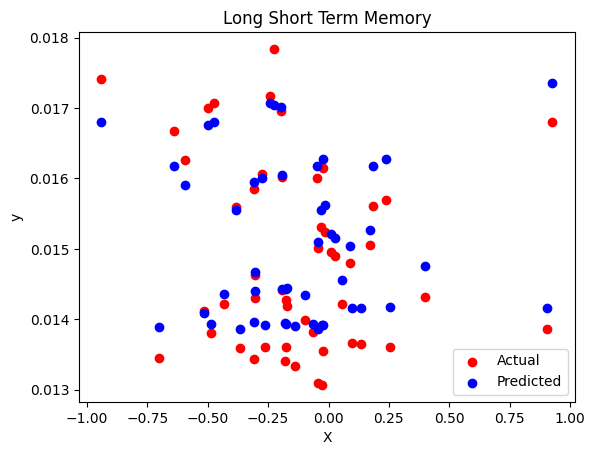

In [35]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae=mean_absolute_error(y_test,y_pred)
mape=mean_absolute_percentage_error(y_test,y_pred)
print("Mean Squared Error:", mse)
print("Mean aboslute Error:", mae)
print("Mean absolute percentage Error:", mape)
xtes=X_test[:,6]
print(xtes.shape)
print(y_test.shape)
# Plot the results
plt.scatter(xtes, y_test, color='red', label='Actual')
plt.scatter(xtes, y_pred, color='blue', label='Predicted')
plt.title('Long Short Term Memory')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

7.RNN

In [36]:
import tensorflow as tf
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Prepare the data
x = ws[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Underlying Log Returns (C)', 'Previous Day Underlying Volatility (D)']]
y = ws['Current Day Underlying Daily Volatility (E)']

# Scale the data
scaler = MinMaxScaler(feature_range=(-1, 1))
scaled_data = scaler.fit_transform(x)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(scaled_data, y, test_size=0.2, random_state=100)

# Create the RNN model
model = tf.keras.Sequential([
    tf.keras.layers.RNN(tf.keras.layers.SimpleRNNCell(64), return_sequences=True, input_shape=(X_train.shape[1], 1)),
    tf.keras.layers.RNN(tf.keras.layers.SimpleRNNCell(32)),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32)

# Make predictions on the test data
y_pred = model.predict(X_test)


Epoch 1/100
7/7 [==============================] - 4s 15ms/step - loss: 0.0457
Epoch 2/100
7/7 [==============================] - 0s 14ms/step - loss: 0.0081
Epoch 3/100
7/7 [==============================] - 0s 11ms/step - loss: 0.0051
Epoch 4/100
7/7 [==============================] - 0s 13ms/step - loss: 0.0025
Epoch 5/100
7/7 [==============================] - 0s 10ms/step - loss: 9.8850e-04
Epoch 6/100
7/7 [==============================] - 0s 10ms/step - loss: 5.9833e-04
Epoch 7/100
7/7 [==============================] - 0s 12ms/step - loss: 6.0172e-04
Epoch 8/100
7/7 [==============================] - 0s 13ms/step - loss: 3.8879e-04
Epoch 9/100
7/7 [==============================] - 0s 11ms/step - loss: 2.7493e-04
Epoch 10/100
7/7 [==============================] - 0s 9ms/step - loss: 2.1121e-04
Epoch 11/100
7/7 [==============================] - 0s 8ms/step - loss: 1.6947e-04
Epoch 12/100
7/7 [==============================] - 0s 12ms/step - loss: 1.0745e-04
Epoch 13/100
7/7 [=

Mean Squared Error: 2.7157364342375718e-05
Mean aboslute Error: 0.0037448224382217775
Mean absolute percentage Error: 0.25392230022719325
(50,)
(50,)


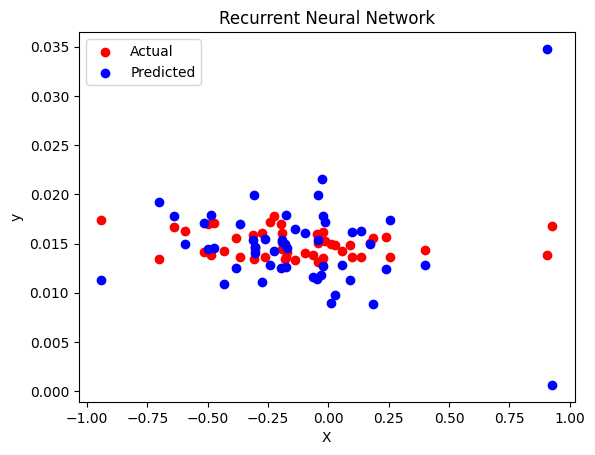

In [37]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae=mean_absolute_error(y_test,y_pred)
mape=mean_absolute_percentage_error(y_test,y_pred)
print("Mean Squared Error:", mse)
print("Mean aboslute Error:", mae)
print("Mean absolute percentage Error:", mape)
xtes=X_test[:,6]
print(xtes.shape)
print(y_test.shape)
# Plot the results
plt.scatter(xtes, y_test, color='red', label='Actual')
plt.scatter(xtes, y_pred, color='blue', label='Predicted')
plt.title('Recurrent Neural Network')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()